<a href="https://colab.research.google.com/github/giovanni-lucarelli/distribution-shift/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic data: 2D

## Multinormal distribution (non null corr)

Importing the packages

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed for reproducibility

In [67]:
np.random.seed(1)

data generation from a multinormal.

In [68]:
# Generate a 2x2 positive semidefinite symmetric matrix
matrix_size = 2
# Method 1: Using random orthogonal matrix
A = np.random.rand(matrix_size, matrix_size)
A = A * 10

# Parameters for the multivariate normal distribution

cov0 = np.dot(A, A.transpose())  # positive matrix decomposition
mean0 = [10,20]

# Number of samples
N = 1000

# Generate samples
X = np.random.multivariate_normal(mean0, cov0, N)
X

array([[14.86698314, 19.95109043],
       [ 3.83067415, 14.51116653],
       [-4.16337534, 14.25492106],
       ...,
       [ 5.74781424, 17.2244446 ],
       [ 4.00270232, 20.15830383],
       [ 5.82523373, 19.0087314 ]])

define the relationship between X and Y: polinomial relationship + logistic transformation

In [69]:
# Define the polynomial function (no interactions)
def polynomial_features(X):
    interaction_term = X[:, 0] * X[:, 1]  # Calcola il prodotto delle due feature
    return np.column_stack([np.ones(len(X)), X, X**2, interaction_term]) # bias, linear, quadratic and interaction

# Define the logistic (sigmoid) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


generate the y

In [70]:
weights = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6]) #6 weights: 1 for the bias + 2 linear + 2 quadratic + 1 interaction

# Generate polynomial features
X_poly = polynomial_features(X)

# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

build the dataframe

In [71]:
# Create a Pandas DataFrame for the generated data
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(matrix_size)])
df['target'] = y

print(df.head())
print(df['target'].value_counts())

   feature_1  feature_2  target
0  14.866983  19.951090       1
1   3.830674  14.511167       0
2  -4.163375  14.254921       0
3   7.459221  18.798361       0
4  -1.236098  13.234694       0
target
0    641
1    359
Name: count, dtype: int64


In [72]:
df.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.000000
mean,9.668893,19.934338,0.359000
std,8.371123,3.088680,0.479947
min,-17.335980,10.228996,0.000000
25%,4.066264,17.819025,0.000000
50%,9.443126,19.959616,0.000000
75%,15.285544,21.975577,1.000000
max,35.167745,30.271915,1.000000


## Mixture of two multinormal
Building the second distribution

In [73]:
# Generate a random orthogonal matrix
from scipy.stats import ortho_group

# Generate a random orthogonal matrix
random_orthogonal_matrix = ortho_group.rvs(dim=2)

# Rotate the positive definite matrix
cov1 = np.dot(random_orthogonal_matrix, np.dot(cov0, random_orthogonal_matrix.T))

mean1 = [x * 5 for x in mean0]


random sample from the mixture

In [74]:
# Mixing probability
pi = 0.7  # Probability of drawing from the first distribution

# Number of samples
N = 1000

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[pi, 1-pi]) #0 for the first distribution and 1 for the second distribution
X = np.zeros((N,matrix_size))
for i in range(N):
  if samples[i] == 0:
    X[i] = np.random.multivariate_normal(mean0, cov0)
  else:
    X[i] = np.random.multivariate_normal(mean1, cov1)

In [75]:
weights = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6]) #6 weights: 1 for the bias + 2 linear + 2 quadratic + 1 interaction

# Generate polynomial features
X_poly = polynomial_features(X)

# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

# Create a Pandas DataFrame for the generated data
df1 = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(matrix_size)])
df1['target'] = y

print(df1.head())
print(df1['target'].value_counts())

   feature_1  feature_2  target
0   7.255285  20.302100       0
1   9.457898  18.473645       0
2  45.318798  93.759114       0
3   4.753057  21.030337       0
4   9.727295  17.360757       0
target
0    745
1    255
Name: count, dtype: int64


<ipython-input-69-5f0545982282>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


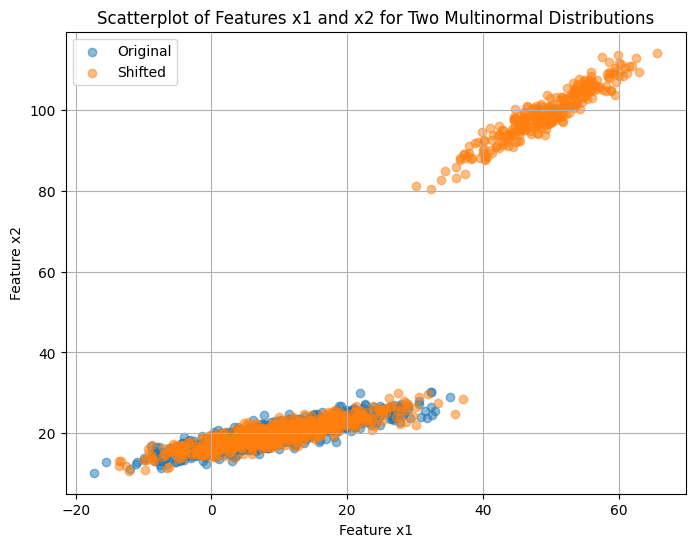

In [78]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], label='Original', alpha=0.5) # Access columns by name
plt.scatter(df1['feature_1'], df1['feature_2'], label='Shifted', alpha=0.5) # Access columns by name
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Scatterplot of Features x1 and x2 for Two Multinormal Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
df.to_csv('original.csv', index=False)
df1.to_csv('shift_07original.csv', index=False)